# Monte Carlo Simulations - Lab

## Introduction

In order to calculate the precise probability of an event occurring, one needs to know the number of occurrences and the number of possible outcomes. If there are a large number of variables, these sample spaces can explode very quickly. Often, these spaces are so large that analyzing all possible outcomes is not  possible. As an alternative, these large sets can be approximated using Monte Carlo simulations. In this lab, you will conduct a Monte Carlo simulation of a permutation test that would otherwise be infeasible to compute.


## Objectives 

In this lab you will:
- Conduct a Monte Carlo simulation

## Exploding sample sizes

As we discussed in the previous lesson, permutation test sizes can quickly explode as our original sample sizes grow. To demonstrate this, create a graph to show how the number of permutations increases as we increase just one of the sample sizes. Assume that our first sample is of 25 individuals. From there, plot a graph of how the permutation test sample size increases drastically as our second sample increases from 10 to 200 individuals. (Assume that every new person has a unique blood pressure; a stretch of an assumption, but greatly simplifies our calculations for now.)

In [28]:
from scipy.special import comb
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

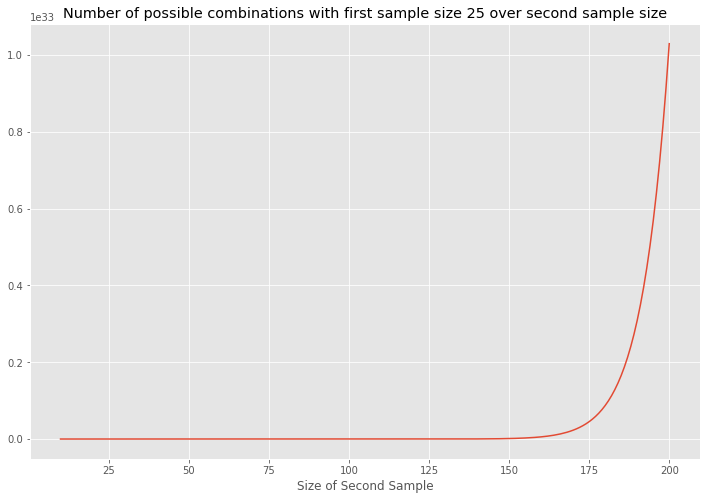

In [31]:
sample_sizes = range(10,201)
num_permutations = {}
for sample_size in sample_sizes:
    num_permutations[sample_size] = comb((25+sample_size), 25)

plt.figure(figsize=(12,8))
plt.plot(num_permutations.keys(), num_permutations.values())
plt.title("Number of possible combinations with first sample size 25 over second sample size")
plt.xlabel("Size of Second Sample")
plt.show()

## Creating the Monte Carlo simulation

Let's expand upon our blood pressure example from the Resampling methods lab. Even with our previous sample sizes of a sample of 14 and a sample of 12, we had a total of over 9 million possible outcomes. As you can see from the graph above, this quantity continues to rapidly increase. As a result, it is often impractical or impossible to calculate all possible variations. Instead, use a Monte Carlo simulation to sample from the sample space in order to emulate a permutation test. While a precise simulation of a permutation test would record which ordered combinations we have already simulate, doing so greatly reduces the speed of the process. Below are the complete samples of two populations' blood pressure.  
  
Write a Monte Carlo simulation to sample from the permutation space. Be sure to not allow replacement so that no cases are repeated. Calculate the p-value after `10, 100, 500, 1000, 10**4, 10**5, 10**6, 2*10**6 and 5*10**6` iterations. Graph these to show how the p-value stabilizes and converges after a large number of iterations.

In [32]:
a = [109.6927759 , 120.27296943, 103.54012038, 114.16555857,
       122.93336175, 110.9271756 , 114.77443758, 116.34159338,
       130.72888419, 116.04552895, 114.8313492 , 117.52704641,
       109.06597142, 117.0317262 , 114.34876391, 111.32151926,
       108.90594481, 110.95040527,  99.15890727, 117.93581615,
       106.35644209, 112.88102458, 103.87574946, 111.88394265,
       115.42450119, 124.02872282, 116.19121625, 115.59471365,
       112.66413025, 118.30562665, 132.31196515, 117.99000948]
b = [123.98967482, 141.11969004, 117.00293412, 121.6419775 ,
       123.2703033 , 123.76944385, 105.95249634, 114.87114479,
       110.50162354, 121.31836918, 124.9483451 , 126.04639783,
       119.71433463, 117.49416398, 129.47657837, 115.57798929,
       117.36035264, 130.92919224, 104.43218778, 119.97610071,
       115.67085089, 113.77487389, 114.02470379, 116.64660978,
       117.3023355 , 116.30944159, 123.66560428, 117.87222118,
       128.8445079 , 111.7976685 , 117.25730744, 111.62121119,
       110.12277446, 112.7150916 , 129.21006268, 125.97287311,
       130.6878082 , 140.60768727, 121.95433026, 123.11996767,
       129.93260914, 121.01049611, 129.23680238]

In [33]:
print(len(a), len(b))

32 43


In [35]:
import numpy as np

In [37]:
#Your code here
diff = np.abs(np.mean(a) - np.mean(b))
bigger_diffs = 0
universe = a + b

for i in range(5*10**6+1):
    # Generate groups
    ai = np.random.choice(universe, size=len(a), replace=False)
    bi = universe.copy()
    for item in ai:
        bi.remove(item)
        
    # Calculate mean difference and compare to original samples
    mean_diff = np.abs(np.mean(ai) - np.mean(bi))
    if mean_diff >= diff:
        bigger_diffs += 1
        
    # Calculate p-val on select trial numbers and print results
    if i in [10, 100, 500, 1000, 10**4, 10**5, 10**6, 2*10**6, 5*10**6]:
        print("The p-val is {} after {} trials.".format((bigger_diffs/i), i))
    
        
# ⏰ This cell may take several minutes to run

The p-val is 0.0 after 10 trials.
The p-val is 0.0 after 100 trials.
The p-val is 0.0 after 500 trials.
The p-val is 0.001 after 1000 trials.
The p-val is 0.0017 after 10000 trials.
The p-val is 0.00112 after 100000 trials.
The p-val is 0.000988 after 1000000 trials.
The p-val is 0.001007 after 2000000 trials.
The p-val is 0.0010202 after 5000000 trials.


In [38]:
# Comparing to a Welch's t-test:
import scipy.stats as stats

stats.ttest_ind(a, b, equal_var=False)

Ttest_indResult(statistic=-3.475777051883668, pvalue=0.000871547873784996)

In [39]:
# We see similar results from the Monte Carlo Simulation and Welch's t-test

## Summary

In this lab you simulated a permutation test and observed both how sample sizes can explode rapidly and how p-values will converge over time in a simulation.